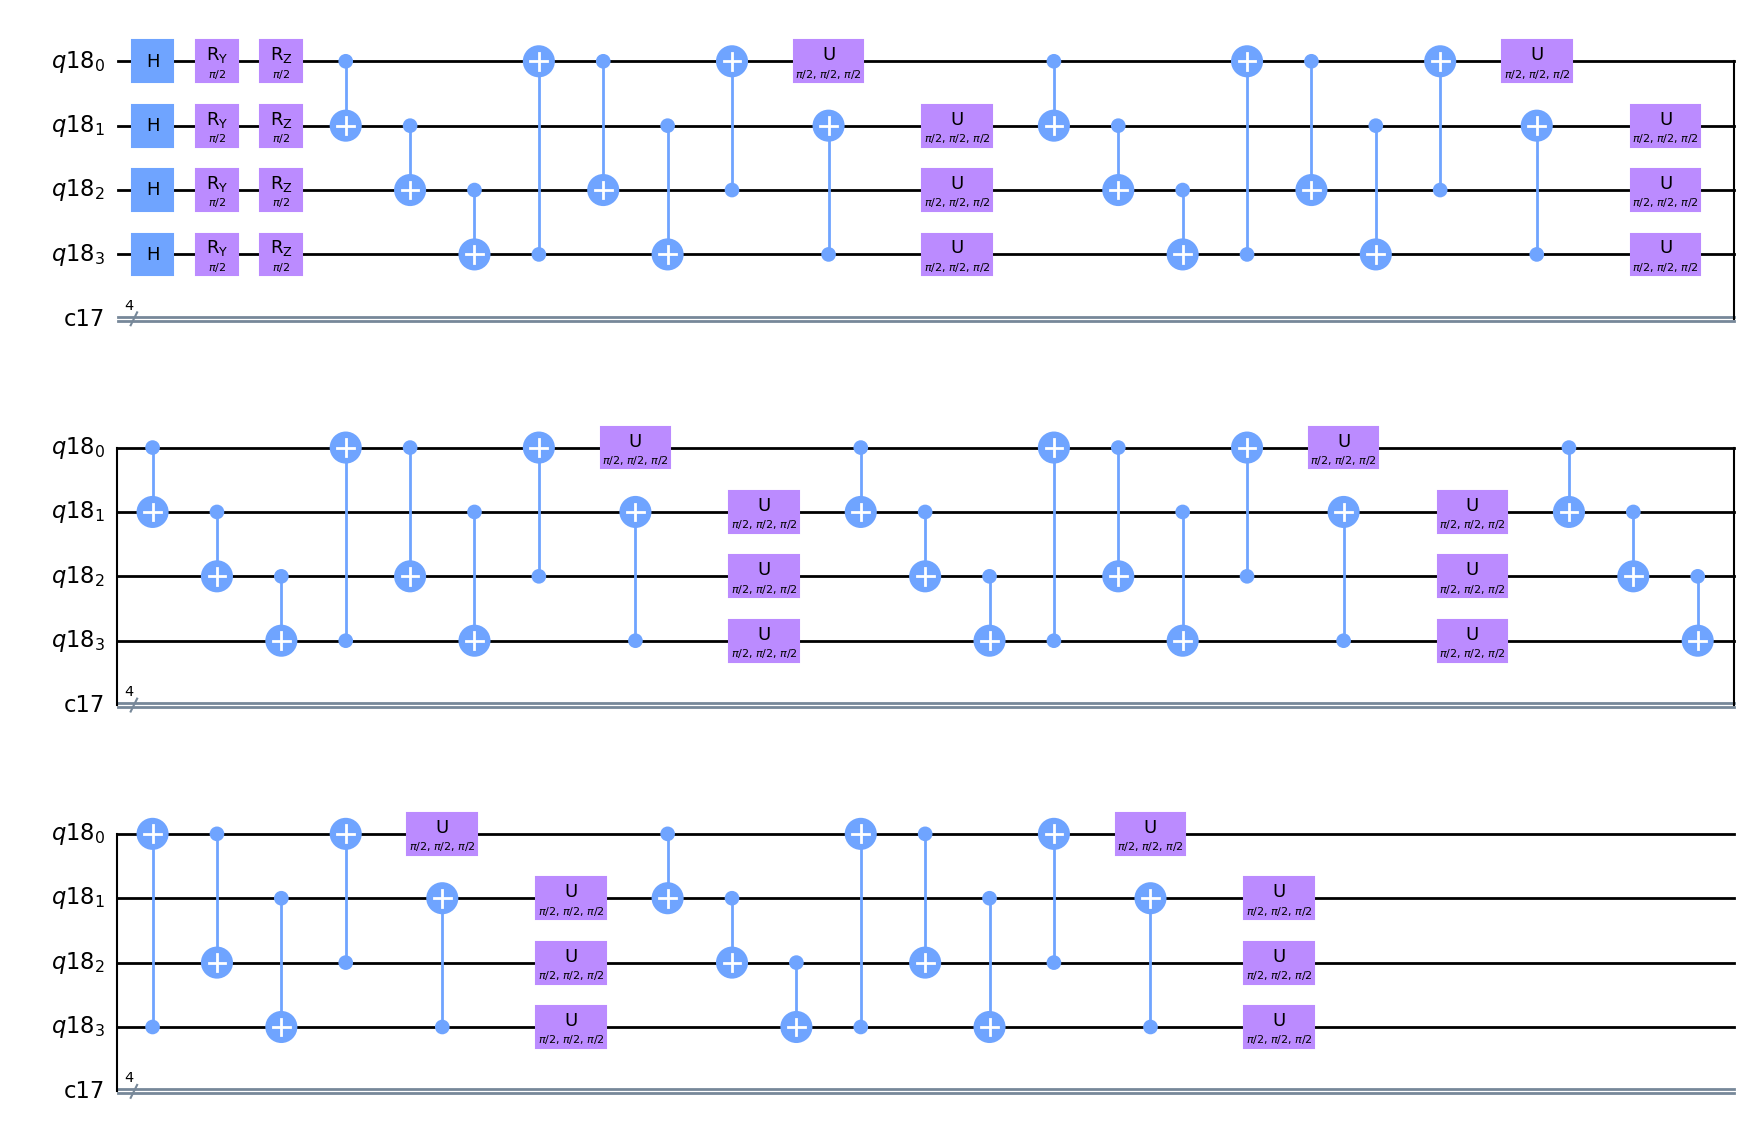

In [20]:
import numpy as np
from qiskit import *
from math import pi

def numberoflayers(ckt1, ckt2, i):
    new = ckt1.compose(ckt2)
    for j in range(0,i-1):
        new = new.compose(ckt2)   
    return new

#circuit parameters
qr = QuantumRegister(4)
cr = ClassicalRegister(4)

measure = QuantumCircuit(qr,cr)
#data encoding layer
measure.h(range(4))
measure.ry(pi/2,range(4))
measure.rz(pi/2,range(4))

# single neural layer; repeat 6 times
layer = QuantumCircuit(qr,cr)
layer.cx(0,1)
layer.cx(1,2)
layer.cx(2,3)
layer.cx(3,0)
layer.cx(0,2)
layer.cx(1,3)
layer.cx(2,0)
layer.cx(3,1)
layer.u(pi/2, pi/2, pi/2, range(4))
# layer.draw('mpl')
# measure.draw('mpl')

# # need to use compose to conca
#new = measure.compose(layer)

new = numberoflayers(measure,layer,6)
new.draw('mpl')
# layer.measure(qr,cr)